In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from fastspecfit.util import C_LIGHT
from fastspecfit.io import read_fastspecfit, cache_templates

In [4]:
fastfile = os.path.join(os.getenv('HOME'), 'fastspec.fits')
fast, meta, _, _ = read_fastspecfit(fastfile)

INFO:io.py:1798:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastspec.fits


In [19]:
redshift = fast['Z'][0]
vdisp = fast['VDISP'][0]
coeff = fast['COEFF'].flatten()

In [20]:
cache = cache_templates(templates='/pscratch/sd/i/ioannis/fastspecfit/templates/1.1.0/ftemplates-chabrier-1.1.0.fits')
cache.keys()

dict_keys(['imf', 'continuum_pixkms', 'pixkms_wavesplit', 'vdisp_nominal', 'templateinfo', 'templatewave', 'templateflux', 'templateflux_nomvdisp', 'templateflux_nolines', 'templateflux_nolines_nomvdisp', 'vdispflux', 'vdispwave', 'vdisp', 'vdisp_nominal_indx'])

In [22]:
cache['continuum_pixkms'], cache['pixkms_wavesplit']

(25.0, 10000.99108255767)

(0.1, 5)

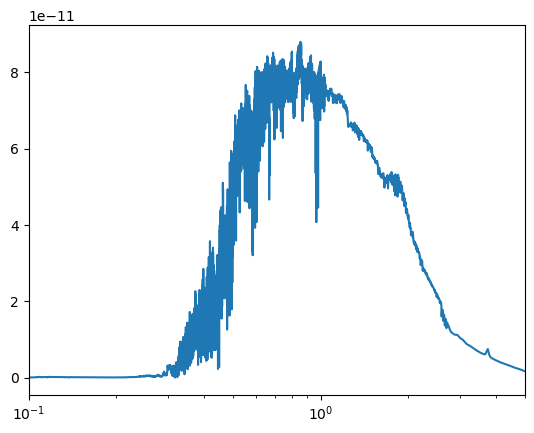

In [17]:
obswave = cache['templatewave'] * (1. + redshift)
obsflux = coeff.dot(cache['templateflux'].T)

fig, ax = plt.subplots()
ax.plot(obswave / 1e4, obsflux)
ax.set_xscale('log')
ax.set_xlim(0.1, 5)